In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_recall_curve
import os

In [2]:
fake_mis_path = "/workspaces/IDS705_ML_Team9/Misclassifications/Fake"
real_mis_path = "/workspaces/IDS705_ML_Team9/Misclassifications/Real"

In [3]:
# load in all images in png format and save them in a list
mis_lst = []
for i in os.listdir(fake_mis_path):
    if i.endswith(".png"):
        mis_lst.append(i)
for i in os.listdir(real_mis_path):
    if i.endswith(".png"):
        mis_lst.append(i)

mis_lst


['Fake-18.png',
 'Fake-7.png',
 'Fake-16.png',
 'Fake0.png',
 'Fake-19.png',
 'Fake-6.png',
 'Fake-4.png',
 'Fake-11.png',
 'Fake-12.png',
 'Fake-15.png',
 'Fake-29.png',
 'Real17.png',
 'Real8.png',
 'Real4.png',
 'Real16.png',
 'Real2.png',
 'Real28.png',
 'Real21.png',
 'Real31.png',
 'Real20.png',
 'Real15.png',
 'Real23.png',
 'Real32.png',
 'Real1.png',
 'Real11.png',
 'Real9.png',
 'Real12.png',
 'Real30.png',
 'Real6.png',
 'Real18.png',
 'Real22.png',
 'Real7.png',
 'Real25.png',
 'Real3.png',
 'Real19.png',
 'Real26.png',
 'Real10.png',
 'Real24.png',
 'Real14.png']

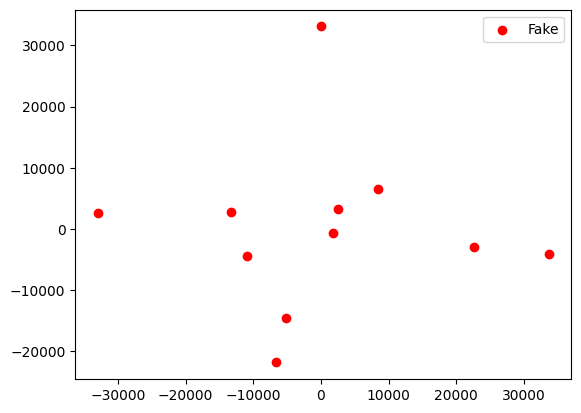

In [4]:
from sklearn.decomposition import PCA
import glob
from PIL import Image


# Load the images
image_paths = glob.glob(fake_mis_path + '/*.png')
images = []
for path in image_paths:
    img = Image.open(path)
    images.append(np.array(img))

# Convert the images to numerical data
data = np.array(images).reshape(len(images), -1)

# Center the data
mean = np.mean(data, axis=0)
data_centered = data - mean

# Compute the covariance matrix
covariance_matrix = np.cov(data_centered)

# Compute the eigenvectors and eigenvalues
pca = PCA()
pca.fit(covariance_matrix)

# Choose the number of components
num_components = 5

# fit the PCA model to the data
pca = PCA(n_components=num_components)
pca.fit(data_centered)

data_transformed_1 = pca.transform(data_centered)

plt.scatter(data_transformed_1[:, 0], data_transformed_1[:, 1], c='r', label='Fake')
plt.legend()
plt.show()

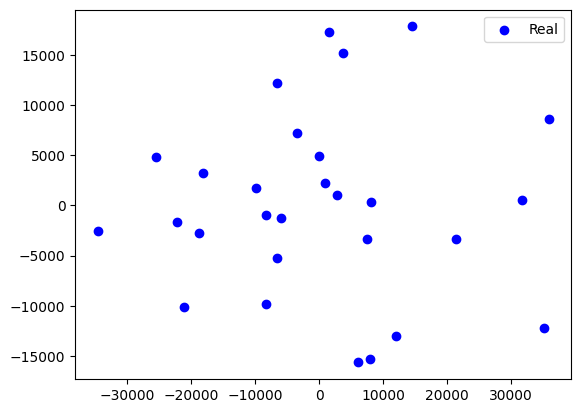

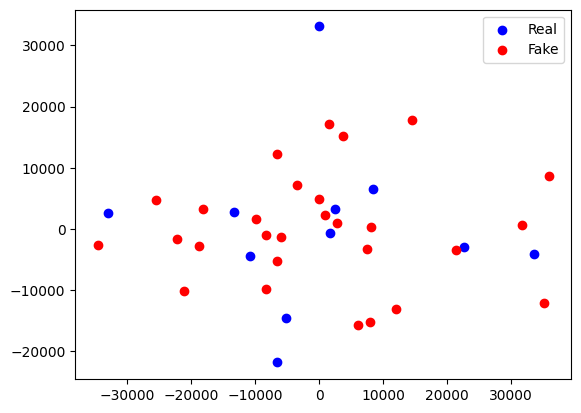

In [5]:
# do the same thing to the real images
# Load the images
image_paths = glob.glob(real_mis_path + '/*.png')
images = []
for path in image_paths:
    img = Image.open(path)
    images.append(np.array(img))

# Convert the images to numerical data
data = np.array(images).reshape(len(images), -1)

# Center the data
mean = np.mean(data, axis=0)
data_centered = data - mean

# Compute the covariance matrix
covariance_matrix = np.cov(data_centered)

# Compute the eigenvectors and eigenvalues
pca = PCA()
pca.fit(covariance_matrix)

# Choose the number of components
num_components = 5

# fit the PCA model to the data
pca = PCA(n_components=num_components)
pca.fit(data_centered)

data_transformed_2 = pca.transform(data_centered)

plt.scatter(data_transformed_2[:, 0], data_transformed_2[:, 1], c='b', label='Real')
plt.legend()
plt.show()

# combine the two plots
plt.scatter(data_transformed_1[:, 0], data_transformed_1[:, 1], c='b', label='Real')
plt.scatter(data_transformed_2[:, 0], data_transformed_2[:, 1], c='r', label='Fake')
plt.legend()
plt.show()

/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/codespace/.loc

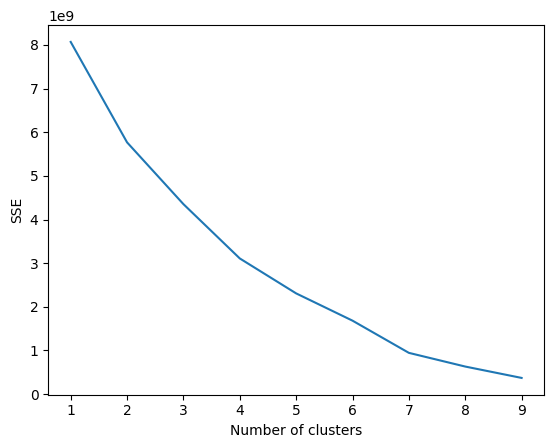

In [6]:
# use clustering to see if we can separate the two classes
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# use the elbow method to find the optimal number of clusters
# for the fake images
sse = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data_transformed_1)
    sse.append(kmeans.inertia_)

plt.plot(range(1, 10), sse)
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.show()


/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/codespace/.loc

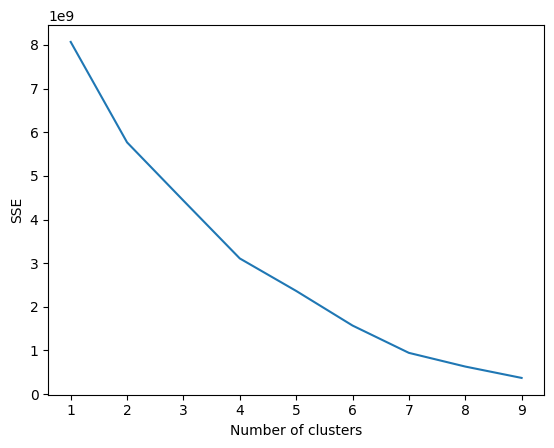

In [7]:
# use the elbow method to find the optimal number of clusters
# for the real images
from sklearn.cluster import KMeans

sse2 = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data_transformed_1)
    sse2.append(kmeans.inertia_)

plt.plot(range(1, 10), sse2)
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.show()




/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


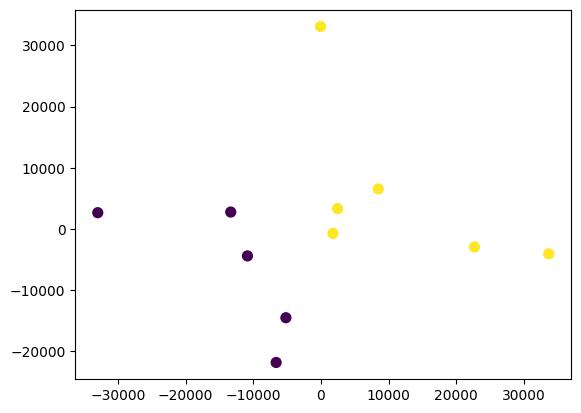

In [8]:
# use kmeans to cluster the fake images
kmeans = KMeans(n_clusters=2)
kmeans.fit(data_transformed_1)
y_kmeans = kmeans.predict(data_transformed_1)

plt.scatter(data_transformed_1[:, 0], data_transformed_1[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_

# plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.show()

Silhouette score for 2 clusters: 0.222458520835478


/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


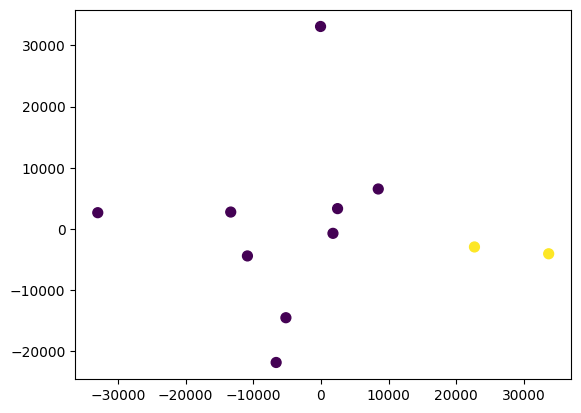

/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for 3 clusters: 0.17947207612275048


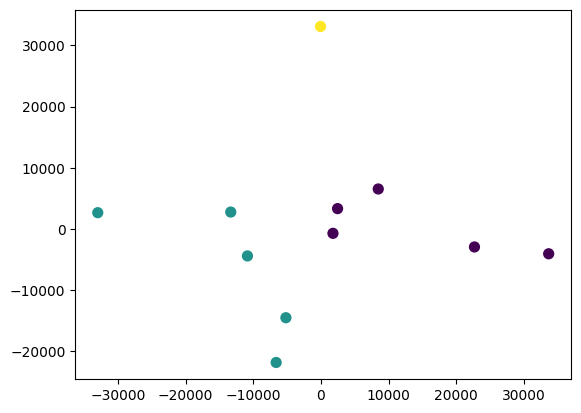

/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for 4 clusters: 0.18780178998110966


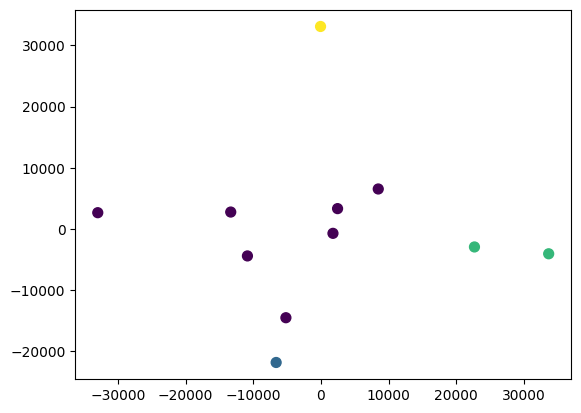

/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for 5 clusters: 0.16843413915745375


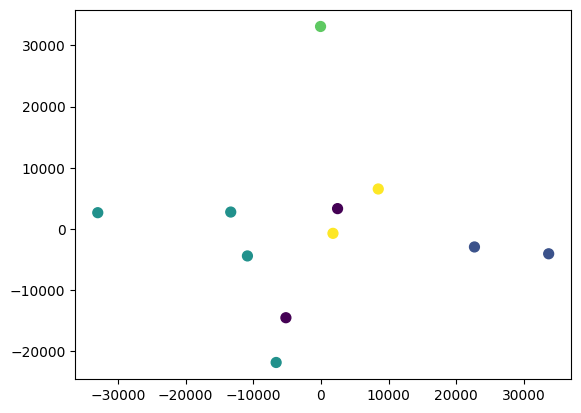

Silhouette score for 6 clusters: 0.15249044171613993


/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


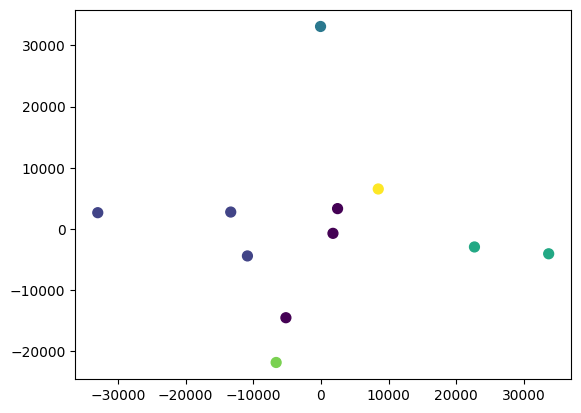

/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for 7 clusters: 0.16165714937348502


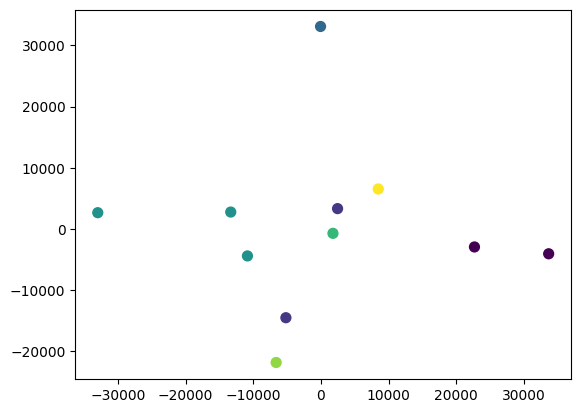

/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for 8 clusters: 0.1337578474421982


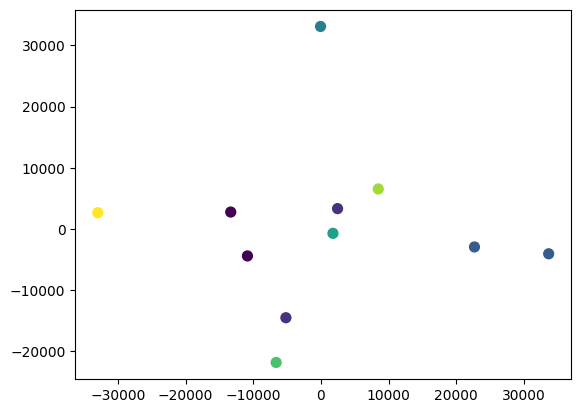

Silhouette score for 9 clusters: 0.1030609101486216


/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


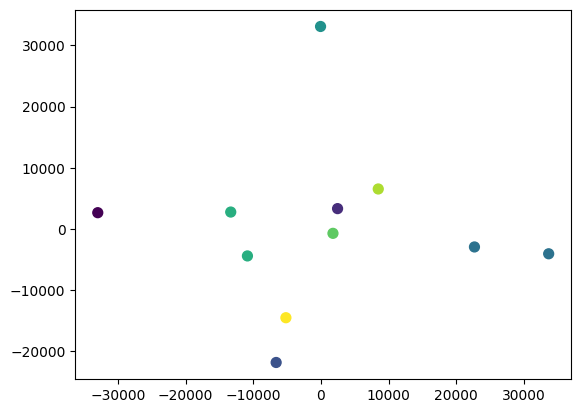

In [9]:
# use for loop to change the number of clusters and see how the silhouette score changes
for i in range(2, 10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data_transformed_1)
    y_kmeans = kmeans.predict(data_transformed_1)
    print("Silhouette score for {} clusters: {}".format(i, silhouette_score(data_transformed_1, y_kmeans)))
    # plot the clusters
    plt.scatter(data_transformed_1[:, 0], data_transformed_1[:, 1], c=y_kmeans, s=50, cmap='viridis')
    centers = kmeans.cluster_centers_
    plt.show()
    

In [10]:
!pip install opencv-contrib-python

In [11]:
# !pip install skimage
# !pip install mahotas

# Texture Feature

In [12]:

# !pip install opencv-python-headless

# get texture features from the images
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import mahotas


# get textual feature from the fake images
fake_mis_path = "/workspaces/IDS705_ML_Team9/Misclassifications/Fake"

# load in all images in png format and save them in a list
mis_lst = []
for i in os.listdir(fake_mis_path):
    if i.endswith(".png"):
        mis_lst.append(i)

# get the texture features from the images
texture_features = []
for i in mis_lst:

    # load the image
    img = cv2.imread(fake_mis_path + "/" + i)

    # convert the image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # get the texture features
    haralick = mahotas.features.haralick(gray).mean(axis=0)

    # append the features to the list
    texture_features.append(haralick)


texture_features

[array([ 3.77290230e-04,  1.52339303e+02,  9.82357303e-01,  4.31826137e+03,
         2.40590437e-01,  1.95512817e+02,  1.71207062e+04,  8.67656433e+00,
         1.24638704e+01,  3.30741026e-04,  4.19579747e+00, -3.78624147e-01,
         9.98396170e-01]),
 array([ 9.37696214e-04,  1.78045458e+02,  9.77913124e-01,  4.03145831e+03,
         2.91936962e-01,  2.01777148e+02,  1.59477878e+04,  8.51170978e+00,
         1.20860220e+01,  3.70177253e-04,  4.14281450e+00, -3.95217098e-01,
         9.98599261e-01]),
 array([ 1.10701667e-03,  1.22031090e+02,  9.81091579e-01,  3.22676579e+03,
         2.61774316e-01,  2.08648257e+02,  1.27850321e+04,  8.25903665e+00,
         1.18323500e+01,  3.95193994e-04,  4.04877376e+00, -3.77168787e-01,
         9.97848459e-01]),
 array([ 2.96540651e-04,  2.72836886e+02,  9.59376257e-01,  3.35771895e+03,
         2.22274390e-01,  2.51504958e+02,  1.31580389e+04,  8.69211968e+00,
         1.27010730e+01,  3.00567487e-04,  4.38539207e+00, -3.52105494e-01,
       

In [13]:
# get texture features from the real images
real_mis_path = "/workspaces/IDS705_ML_Team9/Misclassifications/Real"

# load in all images in png format and save them in a list
mis_lst_real = []
for i in os.listdir(real_mis_path):
    if i.endswith(".png"):
        mis_lst_real.append(i)

# get the texture features from the images
texture_features_real = []
for i in mis_lst_real:
    
        # load the image
        img = cv2.imread(real_mis_path + "/" + i)
    
        # convert the image to grayscale
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
        # get the texture features
        haralick = mahotas.features.haralick(gray).mean(axis=0)
    
        # append the features to the list
        texture_features_real.append(haralick)

texture_features_real

[array([ 1.71256738e-03,  7.97755394e+01,  9.89131584e-01,  3.66986890e+03,
         3.58270899e-01,  1.48535992e+02,  1.45997001e+04,  8.29837863e+00,
         1.13111845e+01,  5.29303131e-04,  3.59690618e+00, -4.51451217e-01,
         9.99282288e-01]),
 array([ 5.49406151e-04,  1.44925292e+02,  9.70165809e-01,  2.43059043e+03,
         2.46210137e-01,  3.67799510e+02,  9.57743642e+03,  8.17423806e+00,
         1.18851771e+01,  3.47059982e-04,  4.11083404e+00, -3.46933114e-01,
         9.96290629e-01]),
 array([ 3.27435541e-03,  9.13920442e+01,  9.76242708e-01,  1.92311051e+03,
         2.87439252e-01,  8.54202644e+01,  7.60105000e+03,  7.51664109e+00,
         1.08609893e+01,  3.93553749e-04,  3.94958047e+00, -3.33593942e-01,
         9.93208502e-01]),
 array([ 3.67342692e-04,  1.23175020e+02,  9.84769260e-01,  4.04318780e+03,
         2.67989542e-01,  2.13399134e+02,  1.60495762e+04,  8.73900084e+00,
         1.23258727e+01,  3.72929951e-04,  4.01407621e+00, -4.10750521e-01,
       

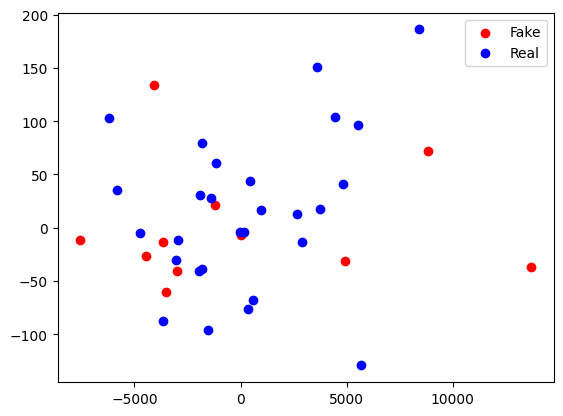

/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/codespace/.loc

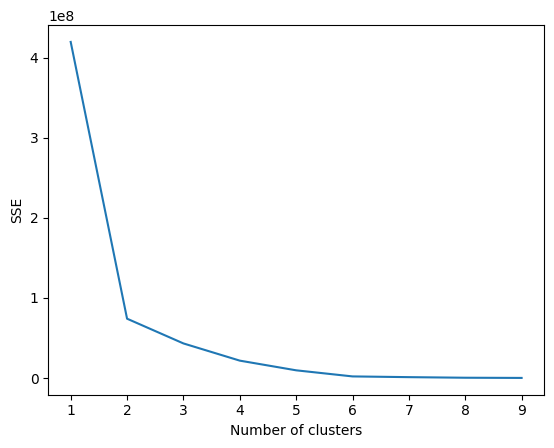

/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


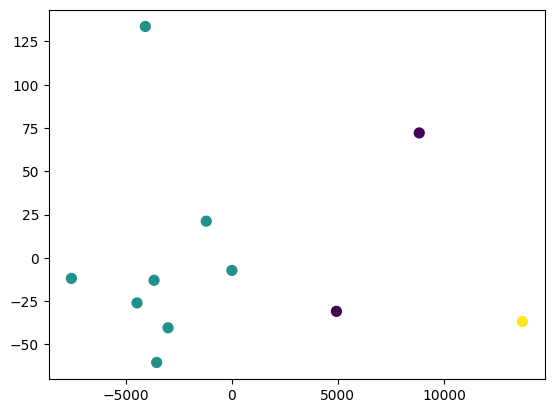

In [14]:
# do some dimensionality reduction on the texture features
from sklearn.decomposition import PCA

# do PCA on the fake images
pca = PCA(n_components=2)
pca.fit(texture_features[:11])
texture_features_transformed = pca.transform(texture_features)

# do PCA on the real images
pca = PCA(n_components=2)
pca.fit(texture_features_real[:11])
texture_features_transformed_real = pca.transform(texture_features_real)

# plot the two classes
plt.scatter(texture_features_transformed[:, 0], texture_features_transformed[:, 1], c='r', label='Fake')
plt.scatter(texture_features_transformed_real[:, 0], texture_features_transformed_real[:, 1], c='b', label='Real')
plt.legend()
plt.show()

# use clustering to see if we can separate the two classes
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# use the elbow method to find the optimal number of clusters
# for the fake images
sse = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(texture_features_transformed)
    sse.append(kmeans.inertia_)

plt.plot(range(1, 10), sse)
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.show()

# try cluster = 3 and plot the clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(texture_features_transformed)
y_kmeans = kmeans.predict(texture_features_transformed)

plt.scatter(texture_features_transformed[:, 0], texture_features_transformed[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_

# plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

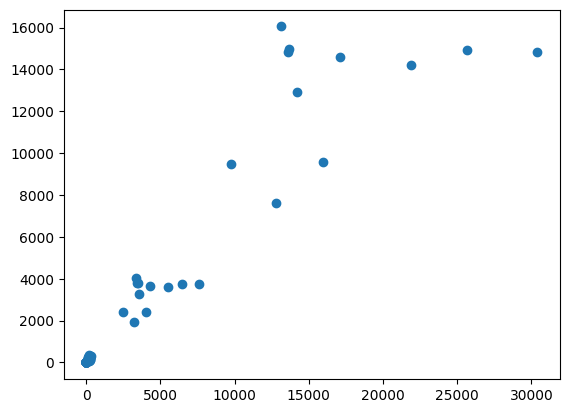

In [15]:
# compare these two lists in a scatter plot
plt.scatter(texture_features, texture_features_real[:11])
plt.show()

/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/codespace/.loc

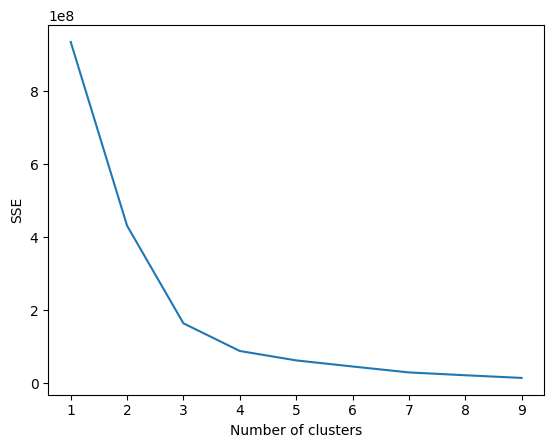

/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [16]:
# concat the two lists
texture_features_all = texture_features + texture_features_real

# find out the best number of clusters
sse = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(texture_features_all)
    sse.append(kmeans.inertia_)
    
plt.plot(range(1, 10), sse)
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.show()

# about 4 clusters or 5 clusters, try 4 first
kmeans = KMeans(n_clusters=4)
kmeans.fit(texture_features_all)
y_kmeans = kmeans.predict(texture_features_all)



In [17]:
len(texture_features_all)

39

Text(0.5, 1.0, 'Clusters of Misclassified Fake and Real Images')

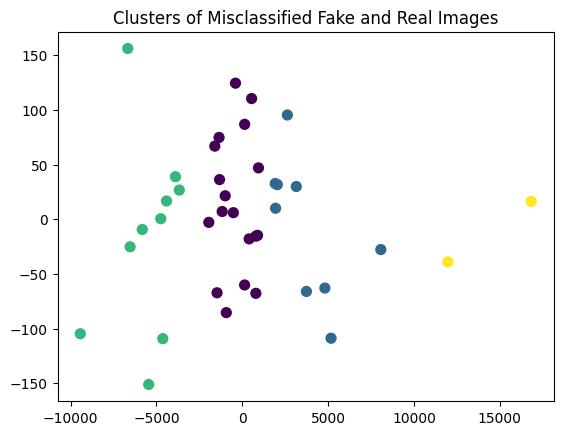

In [19]:
# plot the clusters in visualization using PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=4)
pca.fit(texture_features_all)
texture_features_transformed_all = pca.transform(texture_features_all)


plt.scatter(texture_features_transformed_all[:, 0], texture_features_transformed_all[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.title("Clusters of Misclassified Fake and Real Images")

In [ ]:
# import cv2
# import numpy as np
# import glob

# # Define the path to the image directory
# image_path = fake_mis_path

# # Set the parameters for contour detection
# thresh = 127
# max_value = 255
# mode = cv2.RETR_EXTERNAL
# method = cv2.CHAIN_APPROX_SIMPLE

# # Set the parameters for ellipse fitting
# min_contour_area = 100
# min_ellipse_axis_length = 30

# # Create a list to store the rotation angles of the objects in the images
# rotation_angles = []

# # Get a list of image paths
# image_paths = glob.glob(image_path + '/*.png')

# # Loop over the image paths and analyze the rotation of each image
# for path in image_paths:
#     # Load the image and convert it to grayscale
#     img = cv2.imread(path)
#     gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#     # Apply thresholding to create a binary image
#     ret, thresh = cv2.threshold(gray, thresh, max_value, cv2.THRESH_BINARY)

#     # Find contours in the binary image
#     contours, hierarchy = cv2.findContours(thresh, mode, method)

#     # Loop over the contours and fit an ellipse to each contour
#     for contour in contours:
#         area = cv2.contourArea(contour)
#         if area > min_contour_area:
#             ellipse = cv2.fitEllipse(contour)
#             major_axis_length = max(ellipse[1])
#             minor_axis_length = min(ellipse[1])
#             if major_axis_length > min_ellipse_axis_length and minor_axis_length > min_ellipse_axis_length:
#                 rotation_angle = ellipse[2]
#                 rotation_angles.append(rotation_angle)

# # Compute the mean and standard deviation of the rotation angles
# mean_angle = np.mean(rotation_angles)
# stddev_angle = np.std(rotation_angles)

# # Print the mean and standard deviation of the rotation angles
# print(f"Mean rotation angle: {mean_angle}")
# print(f"Standard deviation of rotation angles: {stddev_angle}")


In [ ]:
image_paths

['/workspaces/IDS705_ML_Team9/Misclassifications/Real/Real17.png',
 '/workspaces/IDS705_ML_Team9/Misclassifications/Real/Real8.png',
 '/workspaces/IDS705_ML_Team9/Misclassifications/Real/Real4.png',
 '/workspaces/IDS705_ML_Team9/Misclassifications/Real/Real16.png',
 '/workspaces/IDS705_ML_Team9/Misclassifications/Real/Real2.png',
 '/workspaces/IDS705_ML_Team9/Misclassifications/Real/Real28.png',
 '/workspaces/IDS705_ML_Team9/Misclassifications/Real/Real21.png',
 '/workspaces/IDS705_ML_Team9/Misclassifications/Real/Real31.png',
 '/workspaces/IDS705_ML_Team9/Misclassifications/Real/Real20.png',
 '/workspaces/IDS705_ML_Team9/Misclassifications/Real/Real15.png',
 '/workspaces/IDS705_ML_Team9/Misclassifications/Real/Real23.png',
 '/workspaces/IDS705_ML_Team9/Misclassifications/Real/Real32.png',
 '/workspaces/IDS705_ML_Team9/Misclassifications/Real/Real1.png',
 '/workspaces/IDS705_ML_Team9/Misclassifications/Real/Real11.png',
 '/workspaces/IDS705_ML_Team9/Misclassifications/Real/Real9.png',
